Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

### importing modules and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

df = pd.read_csv('insurance.csv')

### custom functions

In [2]:
#dataset characteristics
def eda_est(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = round(df.isnull().mean()*100, 1)
    eda_df['dtypes'] = df.dtypes
    eda_df['uniq_val'] = df.nunique()
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

### EDA

In [3]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
313,49,male,35.86,0,no,southeast,8124.4084
629,44,female,38.95,0,yes,northwest,42983.4585
997,63,female,36.85,0,no,southeast,13887.9685
1209,59,male,37.10,1,no,southwest,12347.1720
597,34,female,33.25,1,no,northeast,5594.8455


In [4]:
print('Number of observations: ', df.shape[0])
eda_est(df).sort_values(by=['dtypes', 'uniq_val'])

Number of observations:  1338


,null_sum,null_pct,dtypes,uniq_val,count,mean,median,min,max
children,0,0.0,int64,6,1338,1.094918,1.000,0,5
age,0,0.0,int64,47,1338,39.207025,39.000,18,64
bmi,0,0.0,float64,548,1338,30.663397,30.400,15.96,53.13
charges,0,0.0,float64,1337,1338,13270.422265,9382.033,1121.87,63770.4
sex,0,0.0,object,2,1338,NaN,NaN,female,male
smoker,0,0.0,object,2,1338,NaN,NaN,no,yes
region,0,0.0,object,4,1338,NaN,NaN,northeast,southwest


1. there are no NA/null results, **filling missing values not needed**
2. distribution of values:
   - 'children': 0-5 
   - 'age': 18-64
   - 'bmi': 15.96-53.13, **there are no data outliers**

### data preprocessing

*nominal variables should be processed for correct model work*

In [5]:
data = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first='True')

In [6]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
data['sex'] = class_le.fit_transform(data['sex'].values)
data['smoker'] = class_le.fit_transform(data['smoker'].values)

In [7]:
data.head(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### correlation analysis

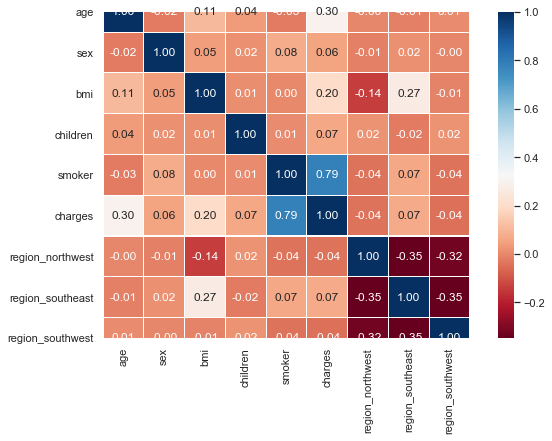

In [8]:
sns.set(font_scale=1)
plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

*multicollinearity not found*

### model

In [9]:
X = data.drop(['charges'], axis=1)
y = data.charges.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1070, 8)
X_test:  (268, 8)
y_train:  (1070,)
y_test:  (268,)


### let's try 3 models to see which one will predict our data the best way

### linear regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
y_pred_lr = lr.predict(X_test)
MSE_lr = mean_squared_error(y_test, y_pred_lr)
R2_lr = r2_score(y_test, y_pred_lr)

In [12]:
print('MSE: ', MSE_lr)
print('R2: ', R2_lr)

MSE:  33596915.85136146
R2:  0.7835929767120723


### random forest regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
MSE_rf = mean_squared_error(y_test, y_pred_rf)
R2_rf = r2_score(y_test, y_pred_rf)

In [14]:
print('MSE: ', MSE_rf)
print('R2: ', R2_rf)

MSE:  21151436.46936149
R2:  0.8637577501206037


### catboost

In [15]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor()
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)
MSE_cb = mean_squared_error(y_test, y_pred_cb)
R2_cb = r2_score(y_test, y_pred_cb)

Learning rate set to 0.039503
0:	learn: 11641.3165597	total: 51.2ms	remaining: 51.1s
1:	learn: 11300.1347356	total: 53.3ms	remaining: 26.6s
2:	learn: 10995.0682531	total: 56.3ms	remaining: 18.7s
3:	learn: 10667.5893433	total: 59.2ms	remaining: 14.7s
4:	learn: 10363.0671269	total: 61.7ms	remaining: 12.3s
5:	learn: 10079.7208836	total: 63.9ms	remaining: 10.6s
6:	learn: 9806.6062775	total: 65.9ms	remaining: 9.35s
7:	learn: 9548.7780146	total: 66.9ms	remaining: 8.3s
8:	learn: 9298.8544056	total: 68.7ms	remaining: 7.57s
9:	learn: 9049.3910728	total: 70.4ms	remaining: 6.97s
10:	learn: 8822.7486798	total: 72.3ms	remaining: 6.5s
11:	learn: 8586.7388730	total: 73.4ms	remaining: 6.04s
12:	learn: 8371.4041857	total: 74.2ms	remaining: 5.64s
13:	learn: 8172.7969393	total: 75.9ms	remaining: 5.34s
14:	learn: 7985.3342566	total: 77.3ms	remaining: 5.08s
15:	learn: 7821.1765501	total: 78.8ms	remaining: 4.84s
16:	learn: 7652.1350440	total: 80.2ms	remaining: 4.64s
17:	learn: 7482.3914315	total: 81.7ms	rem

171:	learn: 4057.4781932	total: 308ms	remaining: 1.48s
172:	learn: 4053.2069486	total: 309ms	remaining: 1.48s
173:	learn: 4051.1047534	total: 311ms	remaining: 1.47s
174:	learn: 4047.2076027	total: 312ms	remaining: 1.47s
175:	learn: 4045.8194376	total: 314ms	remaining: 1.47s
176:	learn: 4043.7881355	total: 315ms	remaining: 1.47s
177:	learn: 4040.5872996	total: 317ms	remaining: 1.46s
178:	learn: 4037.6738709	total: 318ms	remaining: 1.46s
179:	learn: 4036.4399748	total: 319ms	remaining: 1.46s
180:	learn: 4032.4022431	total: 321ms	remaining: 1.45s
181:	learn: 4031.5220315	total: 322ms	remaining: 1.45s
182:	learn: 4027.4731676	total: 323ms	remaining: 1.44s
183:	learn: 4026.2490606	total: 325ms	remaining: 1.44s
184:	learn: 4022.8492373	total: 326ms	remaining: 1.44s
185:	learn: 4021.3251602	total: 328ms	remaining: 1.43s
186:	learn: 4018.8358031	total: 329ms	remaining: 1.43s
187:	learn: 4015.3409903	total: 330ms	remaining: 1.43s
188:	learn: 4015.0083979	total: 331ms	remaining: 1.42s
189:	learn

334:	learn: 3681.9674032	total: 543ms	remaining: 1.08s
335:	learn: 3680.2422896	total: 545ms	remaining: 1.08s
336:	learn: 3677.9641074	total: 546ms	remaining: 1.07s
337:	learn: 3676.6011193	total: 547ms	remaining: 1.07s
338:	learn: 3675.9942924	total: 549ms	remaining: 1.07s
339:	learn: 3673.4504448	total: 551ms	remaining: 1.07s
340:	learn: 3673.1240773	total: 552ms	remaining: 1.07s
341:	learn: 3671.4479807	total: 553ms	remaining: 1.06s
342:	learn: 3669.2951705	total: 555ms	remaining: 1.06s
343:	learn: 3665.7166266	total: 556ms	remaining: 1.06s
344:	learn: 3664.4666494	total: 558ms	remaining: 1.06s
345:	learn: 3660.4946349	total: 559ms	remaining: 1.06s
346:	learn: 3656.5340087	total: 561ms	remaining: 1.05s
347:	learn: 3654.5112399	total: 563ms	remaining: 1.05s
348:	learn: 3653.2445135	total: 565ms	remaining: 1.05s
349:	learn: 3651.0044545	total: 566ms	remaining: 1.05s
350:	learn: 3649.6536979	total: 567ms	remaining: 1.05s
351:	learn: 3648.0279851	total: 569ms	remaining: 1.05s
352:	learn

484:	learn: 3396.0282118	total: 757ms	remaining: 804ms
485:	learn: 3394.9972316	total: 759ms	remaining: 803ms
486:	learn: 3392.2421898	total: 760ms	remaining: 801ms
487:	learn: 3390.1835947	total: 762ms	remaining: 799ms
488:	learn: 3388.5180968	total: 763ms	remaining: 798ms
489:	learn: 3386.8761648	total: 765ms	remaining: 796ms
490:	learn: 3384.7583475	total: 767ms	remaining: 795ms
491:	learn: 3384.3521938	total: 768ms	remaining: 793ms
492:	learn: 3384.0540845	total: 770ms	remaining: 791ms
493:	learn: 3382.6340426	total: 771ms	remaining: 790ms
494:	learn: 3379.6984856	total: 772ms	remaining: 788ms
495:	learn: 3377.3978668	total: 775ms	remaining: 787ms
496:	learn: 3376.2491287	total: 777ms	remaining: 787ms
497:	learn: 3373.4156867	total: 779ms	remaining: 786ms
498:	learn: 3370.7450201	total: 781ms	remaining: 784ms
499:	learn: 3369.1255784	total: 783ms	remaining: 783ms
500:	learn: 3367.5871270	total: 784ms	remaining: 781ms
501:	learn: 3366.3578181	total: 786ms	remaining: 780ms
502:	learn

642:	learn: 3177.2423831	total: 991ms	remaining: 550ms
643:	learn: 3174.5996816	total: 992ms	remaining: 549ms
644:	learn: 3173.8319779	total: 994ms	remaining: 547ms
645:	learn: 3173.1794244	total: 995ms	remaining: 545ms
646:	learn: 3172.2095797	total: 997ms	remaining: 544ms
647:	learn: 3171.4830335	total: 998ms	remaining: 542ms
648:	learn: 3169.2041766	total: 999ms	remaining: 540ms
649:	learn: 3168.7794199	total: 1s	remaining: 539ms
650:	learn: 3167.1492410	total: 1s	remaining: 537ms
651:	learn: 3166.3934515	total: 1s	remaining: 536ms
652:	learn: 3164.8429058	total: 1s	remaining: 534ms
653:	learn: 3164.0294231	total: 1.01s	remaining: 533ms
654:	learn: 3163.0225707	total: 1.01s	remaining: 531ms
655:	learn: 3160.6142186	total: 1.01s	remaining: 530ms
656:	learn: 3160.3643443	total: 1.01s	remaining: 529ms
657:	learn: 3159.3407044	total: 1.01s	remaining: 527ms
658:	learn: 3158.9930449	total: 1.01s	remaining: 526ms
659:	learn: 3158.5970194	total: 1.02s	remaining: 524ms
660:	learn: 3155.41712

848:	learn: 2946.6139818	total: 1.29s	remaining: 229ms
849:	learn: 2944.4814445	total: 1.29s	remaining: 228ms
850:	learn: 2944.2015262	total: 1.29s	remaining: 226ms
851:	learn: 2944.0760309	total: 1.29s	remaining: 225ms
852:	learn: 2943.0945543	total: 1.29s	remaining: 223ms
853:	learn: 2942.8098802	total: 1.3s	remaining: 222ms
854:	learn: 2942.2897950	total: 1.3s	remaining: 220ms
855:	learn: 2941.9680037	total: 1.3s	remaining: 219ms
856:	learn: 2940.7537619	total: 1.3s	remaining: 217ms
857:	learn: 2940.0899791	total: 1.3s	remaining: 215ms
858:	learn: 2939.7949810	total: 1.3s	remaining: 214ms
859:	learn: 2938.4239755	total: 1.3s	remaining: 212ms
860:	learn: 2936.3622049	total: 1.31s	remaining: 211ms
861:	learn: 2935.2137776	total: 1.31s	remaining: 209ms
862:	learn: 2934.9115593	total: 1.31s	remaining: 208ms
863:	learn: 2933.8571539	total: 1.31s	remaining: 206ms
864:	learn: 2932.9834944	total: 1.31s	remaining: 205ms
865:	learn: 2931.7069368	total: 1.31s	remaining: 203ms
866:	learn: 2929.

998:	learn: 2807.6072245	total: 1.5s	remaining: 1.5ms
999:	learn: 2806.6377588	total: 1.5s	remaining: 0us


In [16]:
print('MSE: ', MSE_cb)
print('R2: ', R2_cb)

MSE:  20300472.903339017
R2:  0.8692390417089191


### model comparison

In [17]:
model_comparison = pd.DataFrame(
    {'model': ['linear regression', 'random forest regression', 'catboost'], 
     'MSE': [round(MSE_lr,2), round(MSE_rf,2), round(MSE_cb,2)], 
     'R2': [R2_lr, R2_rf, R2_cb]}
).sort_values(['R2'], ascending=False)

In [18]:
model_comparison

,model,MSE,R2
2,catboost,20300472.90,0.869239
1,random forest regression,21151436.47,0.863758
0,linear regression,33596915.85,0.783593


##### the best score (min value of MSE, max value of R2) has the model 'catboost' which is recommended for further using

### hyperparameter optimization

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100],
              'eval_metric'   : ['R2']
             }
grid = GridSearchCV(estimator=cb, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 0.1501090	total: 1.24ms	remaining: 60.6ms
1:	learn: 0.2683966	total: 2.31ms	remaining: 55.4ms
2:	learn: 0.3603547	total: 3.73ms	remaining: 58.5ms
3:	learn: 0.4465644	total: 5.42ms	remaining: 62.4ms
4:	learn: 0.5159062	total: 6.92ms	remaining: 62.3ms
5:	learn: 0.5720923	total: 8.26ms	remaining: 60.6ms
6:	learn: 0.6194846	total: 9.59ms	remaining: 58.9ms
7:	learn: 0.6573845	total: 10.2ms	remaining: 53.7ms
8:	learn: 0.6901175	total: 11.5ms	remaining: 52.5ms
9:	learn: 0.7176665	total: 12.9ms	remaining: 51.6ms
10:	learn: 0.7409316	total: 14.2ms	remaining: 50.4ms
11:	learn: 0.7595651	total: 15ms	remaining: 47.6ms
12:	learn: 0.7753903	total: 16.5ms	remaining: 46.9ms
13:	learn: 0.7888122	total: 17.8ms	remaining: 45.8ms
14:	learn: 0.8004247	total: 19.5ms	remaining: 45.4ms
15:	learn: 0.8099267	total: 20.1ms	remaining: 42.7ms
16:	learn: 0.8187045	total: 21.5ms	remaining: 41.7ms
17:	learn: 0.8257133	total: 22.9ms	remaining: 40.6ms
18:	learn: 0.8319953	total: 24.2ms	remaining: 39.5ms
19:	l

**creating the model with new parameters**

In [20]:
cb = CatBoostRegressor(depth=6, eval_metric='R2', iterations=50, learning_rate=0.1)
cb.fit(X_train, y_train)
y_pred_cb_opt = cb.predict(X_test)
MSE_cb_opt = mean_squared_error(y_test, y_pred_cb_opt)
R2_cb_opt = r2_score(y_test, y_pred_cb_opt)

print('MSE: ', MSE_cb_opt)
print('R2: ', R2_cb_opt)

0:	learn: 0.1501090	total: 5.54ms	remaining: 271ms
1:	learn: 0.2683966	total: 6.81ms	remaining: 163ms
2:	learn: 0.3603547	total: 8.62ms	remaining: 135ms
3:	learn: 0.4465644	total: 10.7ms	remaining: 123ms
4:	learn: 0.5159062	total: 12.4ms	remaining: 111ms
5:	learn: 0.5720923	total: 14ms	remaining: 103ms
6:	learn: 0.6194846	total: 15.4ms	remaining: 94.5ms
7:	learn: 0.6573845	total: 16.1ms	remaining: 84.3ms
8:	learn: 0.6901175	total: 17.4ms	remaining: 79.4ms
9:	learn: 0.7176665	total: 18.8ms	remaining: 75.2ms
10:	learn: 0.7409316	total: 20.2ms	remaining: 71.5ms
11:	learn: 0.7595651	total: 21ms	remaining: 66.5ms
12:	learn: 0.7753903	total: 22.4ms	remaining: 63.7ms
13:	learn: 0.7888122	total: 23.8ms	remaining: 61.1ms
14:	learn: 0.8004247	total: 26.3ms	remaining: 61.3ms
15:	learn: 0.8099267	total: 27ms	remaining: 57.4ms
16:	learn: 0.8187045	total: 28.4ms	remaining: 55.2ms
17:	learn: 0.8257133	total: 29.9ms	remaining: 53.1ms
18:	learn: 0.8319953	total: 31.3ms	remaining: 51ms
19:	learn: 0.8375

In [21]:
print("MSE\nFirst model: {}\nOptimized model: {}\n".format(MSE_cb, MSE_cb_opt))
print("R2\nFirst model: {}\nOptimized model: {}".format(R2_cb, R2_cb_opt))

MSE
First model: 20300472.903339017
Optimized model: 18394951.461915728

R2
First model: 0.8692390417089191
Optimized model: 0.8815130321184591


*optimized model has better score*

### feature importance

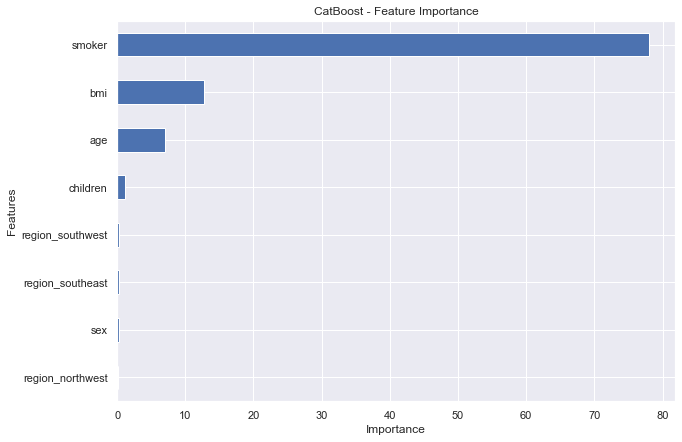

In [22]:
f_i = pd.DataFrame({'imp': cb.feature_importances_, 'col': X.columns})
f_i = f_i.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
f_i.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

*features with the biggest impact: 'smoker', 'bmi', 'age'*